## Heart Attack Prediction

In [1]:
#load dataset
import pandas as pd
df=pd.read_csv('C:/Users/Smriti/Desktop/Mentorness/intern 2/data.xlsx - heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Data Preprocessing and visualization

In [2]:
#finding number of unique values in all features/columns
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

<Axes: >

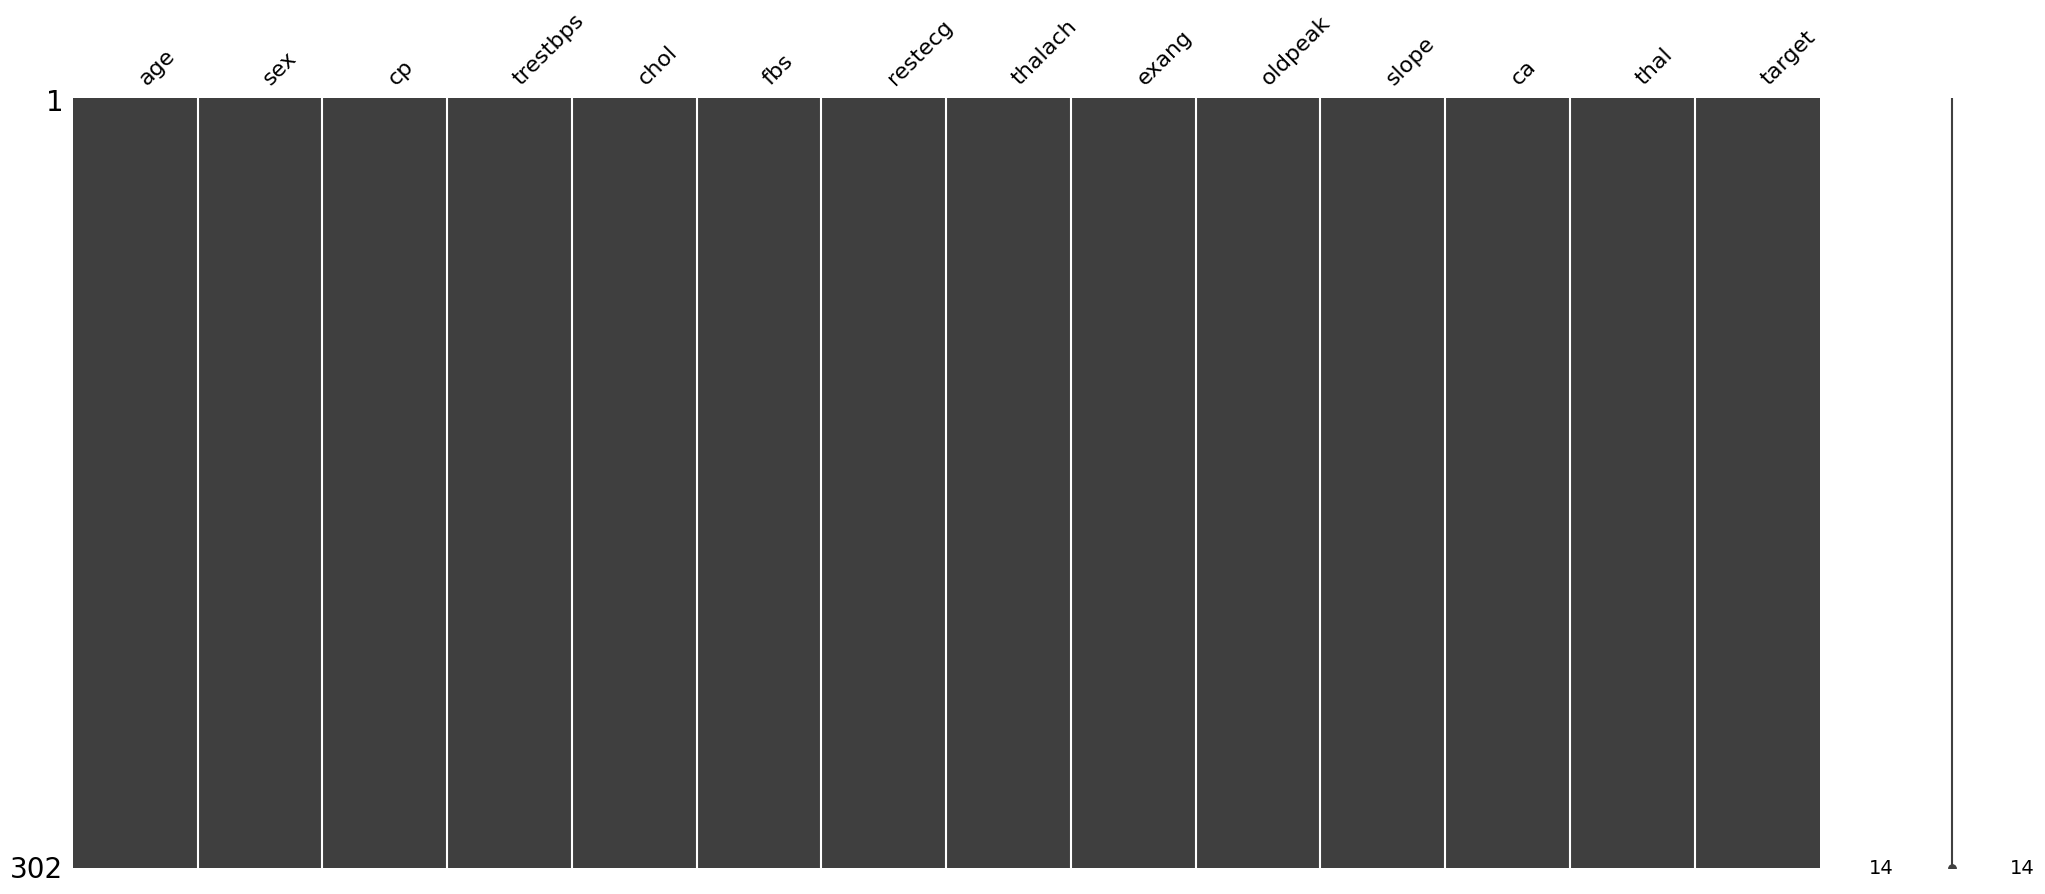

In [3]:
# Data visualization for checking is there any null values present in the dataset
import missingno as msno
msno.matrix(df)

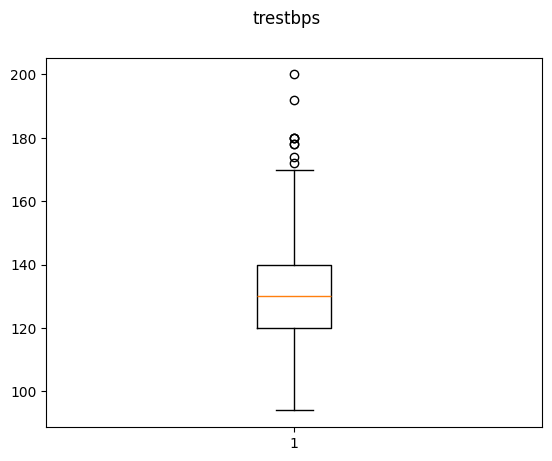

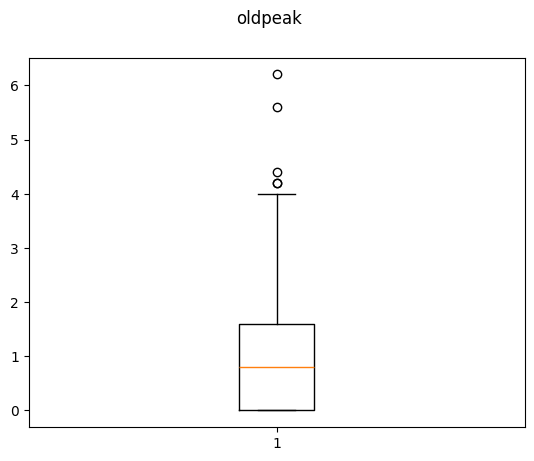

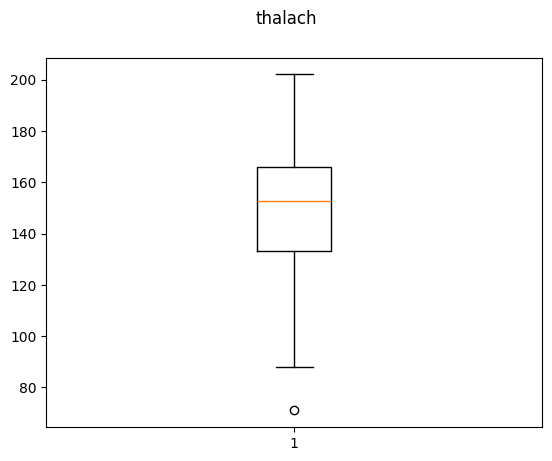

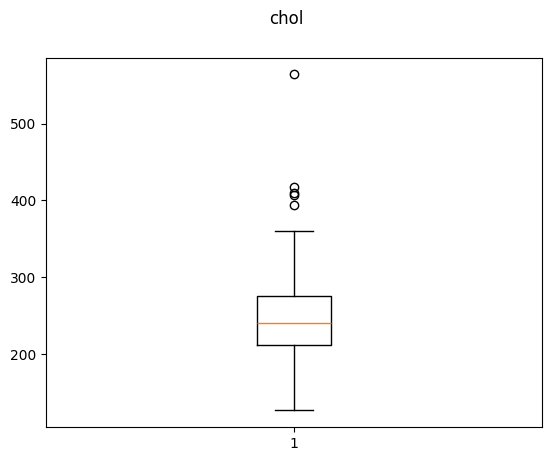

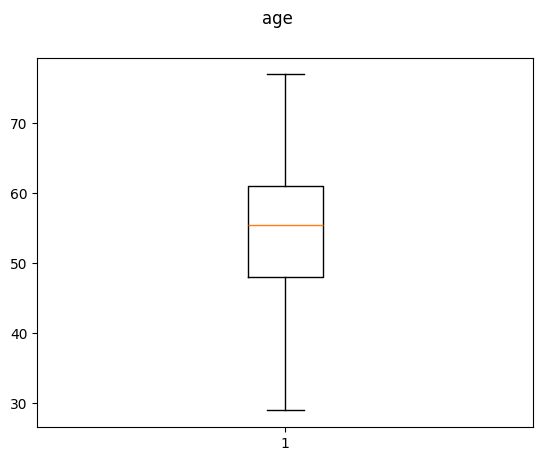

In [4]:
#for discreat numbers finding outliers
import matplotlib.pyplot as plt
num_col=['trestbps','oldpeak','thalach','chol','age']
for i in num_col:
    plt.suptitle(i)
    plt.boxplot(df[i])
    plt.show()

In [5]:
# For some outliers removing row if outlier in chol is greater than 500 and thalach is less than 80
df = df[df['chol'] <= 500]
df = df[df['thalach'] >= 80]


In [6]:
# For some outliers replace with median
import pandas as pd
import numpy as np

def replace_outliers_with_median(df, column):
    # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate the median value
    median_value = df[column].median()
    
    # Replace outliers with the median value
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), 
                          median_value, 
                          df[column])
    
    return df

columns_to_process = ['trestbps', 'chol','oldpeak']

for col in columns_to_process:
    df = replace_outliers_with_median(df, col)


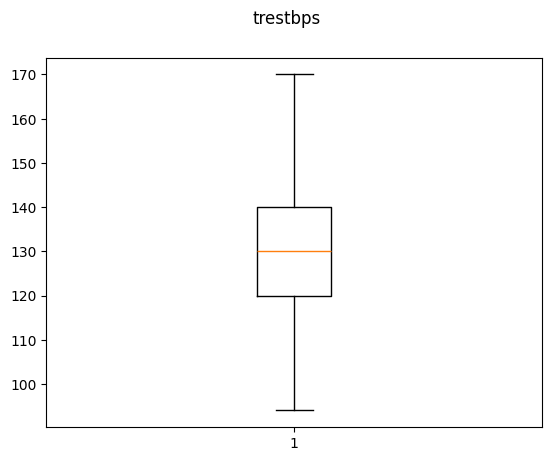

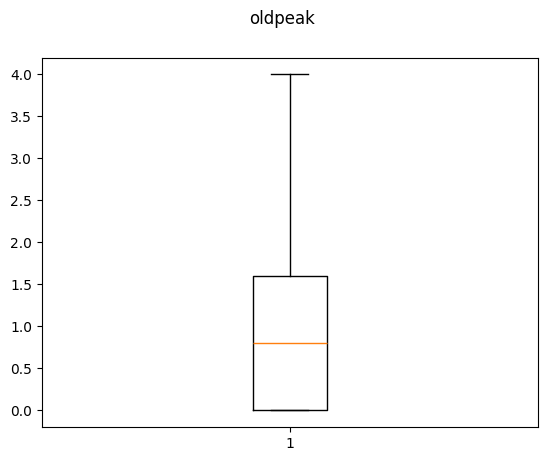

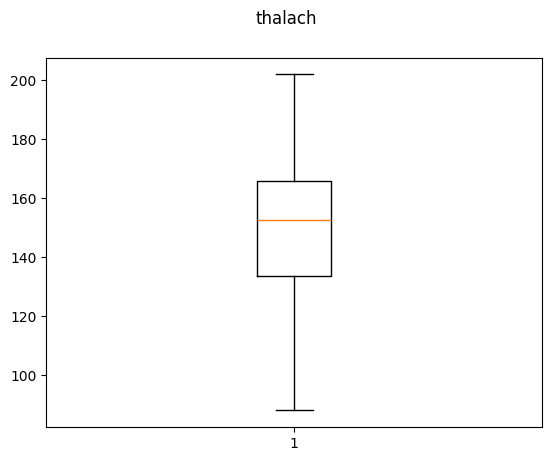

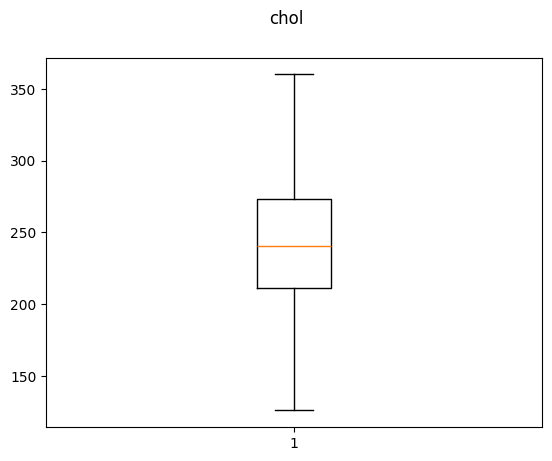

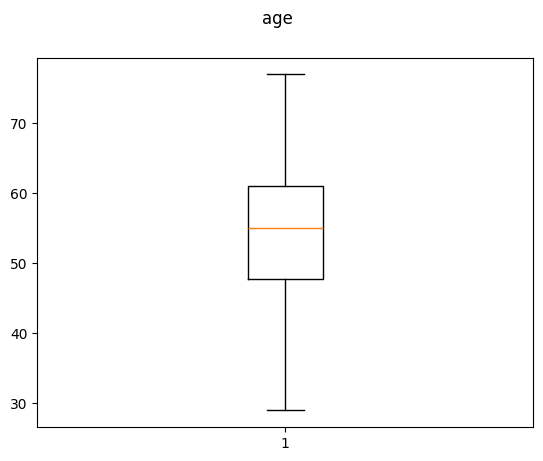

In [7]:
import matplotlib.pyplot as plt
num_col=['trestbps','oldpeak','thalach','chol','age']
for i in num_col:
    plt.suptitle(i)
    plt.boxplot(df[i])
    plt.show()

In [8]:
X = df.drop(columns=['target']) 
y=df['target']

### Training Testing Split

In [9]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest Classification model

Training Accuracy :  0.9125
Model accuracy score with n decision-trees : 0.8500


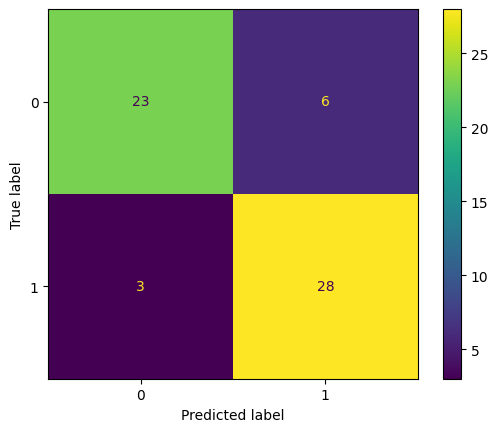

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print accuracy scores
print("Training Accuracy : ", clf.score(X_train, y_train))
print('Model accuracy score with n decision-trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()


In [11]:
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds
k = 5  

# Initialize KFold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)


Cross-Validation Scores: [0.83333333 0.85       0.81666667 0.88333333 0.8       ]
Mean Cross-Validation Score: 0.8366666666666667
Standard Deviation of Cross-Validation Scores: 0.02867441755680873


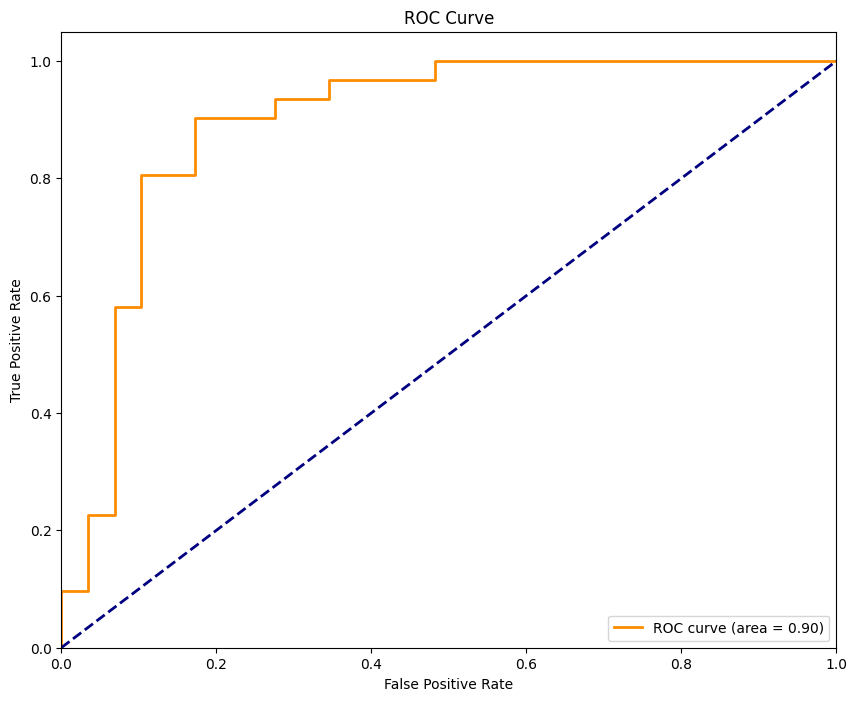

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = clf.predict_proba(X_test)
y_pred_positive = y_pred[:, 1]  # Probabilities of the positive class

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic regression model 
log_reg = LogisticRegression(max_iter=3000)

# Model ko training data par shiksha dena
log_reg.fit(X_train, y_train)

# Test data par predictions karna
y_pred = log_reg.predict(X_test)

# Accuracy ka moolyaankan karna
accuracy = accuracy_score(y_test, y_pred)
print("Training accuracy: ",log_reg.score(X_train, y_train))
print("Accuracy:", accuracy)


Training accuracy:  0.8708333333333333
Accuracy: 0.8333333333333334


In [14]:
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds
k = 5 

# Initialize KFold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)


Cross-Validation Scores: [0.83333333 0.88333333 0.83333333 0.86666667 0.8       ]
Mean Cross-Validation Score: 0.8433333333333334
Standard Deviation of Cross-Validation Scores: 0.029059326290271133


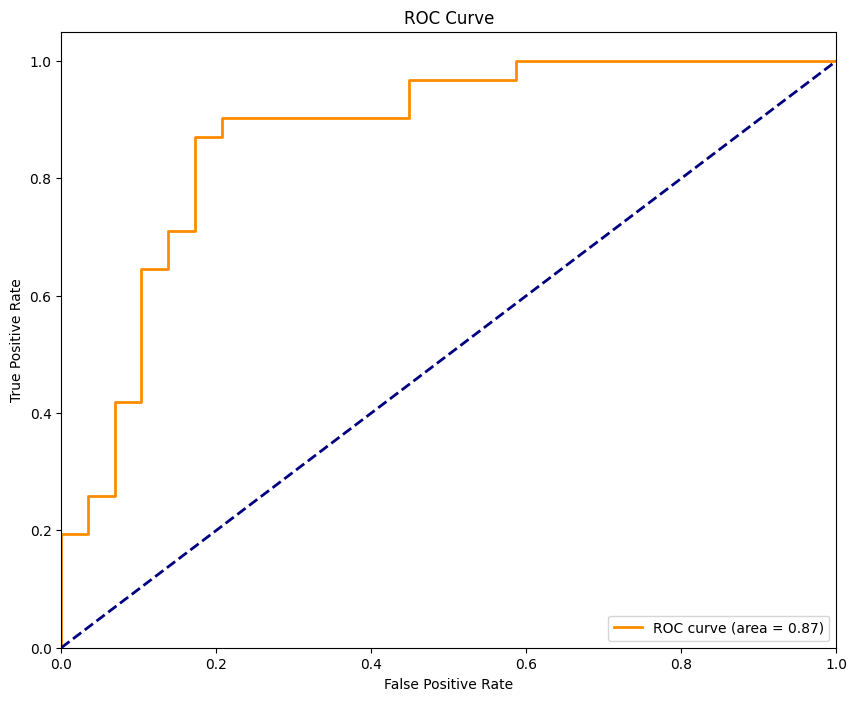

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities of the positive class for the test set
y_prob = log_reg.predict_proba(X_test)
y_prob_positive = y_prob[:, 1]  # Probabilities of the positive class

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


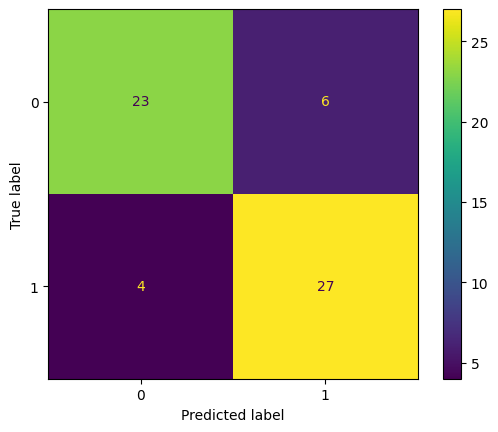

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()